In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day4.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day0.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig2.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day3.jpg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PN

# Import Necessary Libraries

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import MaxPool2D,Convolution2D,Flatten,Dense,MaxPooling2D, Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from PIL import Image
import cv2
import pickle

# To include and convert dataset in the project

In [3]:
train_datagen= ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)
test_datagen= ImageDataGenerator(rescale=1./255)

# Get dataset

In [4]:
train_dataPath="../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train"
test_dataPath="../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test"
train_generator= train_datagen.flow_from_directory(train_dataPath, target_size=(150,150), batch_size=32, class_mode="binary")
test_generator= test_datagen.flow_from_directory(test_dataPath, target_size=(150,150), batch_size=32, class_mode= "binary")

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


# Define classes

In [5]:
len(set(train_generator.classes))

2

# Create our model

In [6]:
model=Sequential()
model.add(Convolution2D(32, kernel_size=(3,3), activation= "relu", input_shape= (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(150, activation= "relu"))
model.add(Dense(2, activation= "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 150)               26284950  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 302       
Total params: 26,286,148
Trainable params: 26,286,148
Non-trainable params: 0
_________________________________________________________________


# Model compile and fit

In [7]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
fitted_model = model.fit_generator(train_generator,
                        epochs = 10,
                        validation_data = test_generator)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
5/5 [==============================] - 13s 3s/step - loss: 3.9155 - accuracy: 0.5623 - val_loss: 0.7522 - val_accuracy: 0.6750
Epoch 2/10
5/5 [==============================] - 8s 2s/step - loss: 3.3291 - accuracy: 0.4935 - val_loss: 2.0932 - val_accuracy: 0.5250
Epoch 3/10
5/5 [==============================] - 8s 2s/step - loss: 1.6885 - accuracy: 0.6299 - val_loss: 0.5009 - val_accuracy: 0.7000
Epoch 4/10
5/5 [==============================] - 8s 2s/step - loss: 1.1003 - accuracy: 0.6249 - val_loss: 0.1399 - val_accuracy: 0.9750
Epoch 5/10
5/5 [==============================] - 9s 2s/step - loss: 0.3779 - accuracy: 0.8572 - val_loss: 0.2268 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 8s 2s/step - loss: 0.4045 - accuracy: 0.8381 - val_loss: 0.1613 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 9s 2s/step - loss: 0.3552 - accuracy: 0.8631 - val_loss: 0.0647 - val_accuracy: 1.0000
Epoch 8/10
5/5 [========================

# Plot accuracy and loss

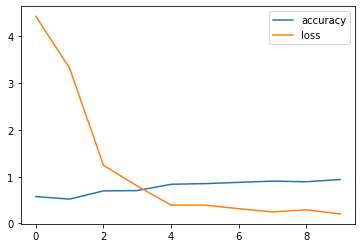

In [9]:
plt.plot([i for i in range(10)],fitted_model.history['accuracy'], label="accuracy")
plt.plot([i for i in range(10)],fitted_model.history['loss'], label= "loss")
plt.legend()